In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from sklearn.decomposition import PCA

In [5]:
raw_df =pd.read_csv('SP500_close_price_raw.csv');
raw_df = raw_df.loc[:, ~raw_df.columns.str.contains('^Unnamed')]

In [6]:
raw_df['date'] = pd.to_datetime(raw_df['date'])

In [7]:
numeric_columns = raw_df.columns[raw_df.columns != 'date']

In [8]:
raw_df[numeric_columns] = raw_df[numeric_columns].astype(float)

In [9]:
raw_df.set_index('date', inplace=True)

In [10]:
log_returns = raw_df.pct_change().apply(lambda x: (1 + x).apply(lambda y: 0 if pd.isna(y) else np.log(y)))

In [11]:
log_returns.reset_index(inplace=True)


In [12]:
log_returns_nodate = log_returns.drop('date', axis=1);

In [13]:
variances = log_returns_nodate.var()

In [14]:
cumulative_variance = variances.cumsum() / variances.sum()

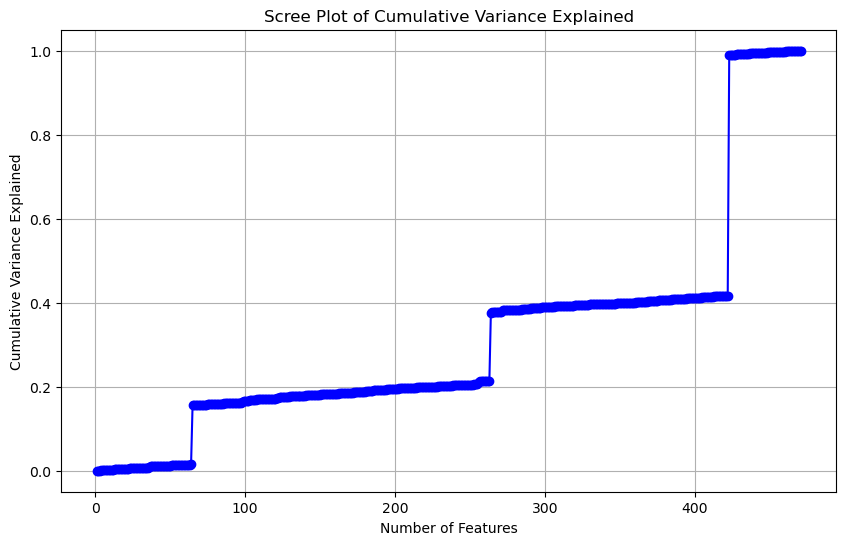

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variances) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Scree Plot of Cumulative Variance Explained')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

In [16]:
standardized_data = (log_returns_nodate - log_returns_nodate.mean()) / log_returns_nodate.std()

In [17]:
pca = PCA()
pca.fit(standardized_data)

PCA()

In [18]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

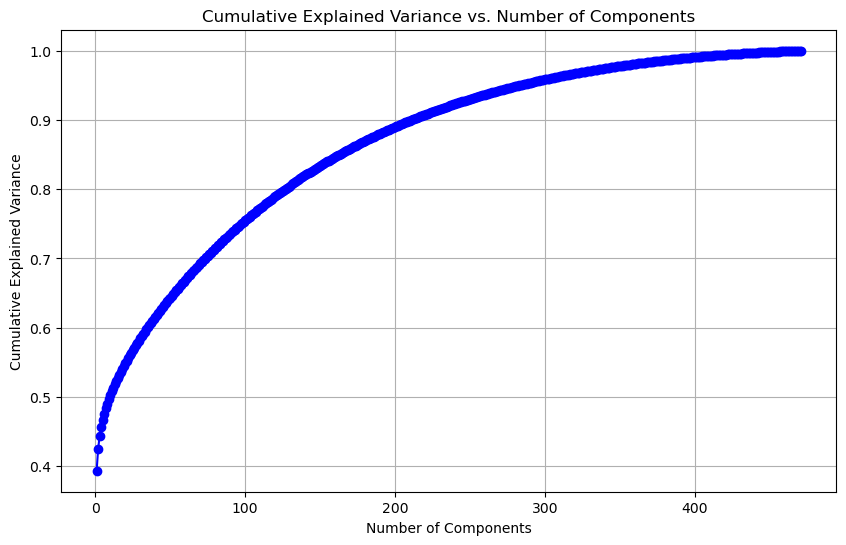

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [67]:
x =0; 
while (cumulative_variance[x]<0.8):
    print(cumulative_variance[x]);
    x+=1;

0.3932775245998208
0.4244627727404476
0.443463073643064
0.4571001460105153
0.46691385035836197
0.47561210967171763
0.4832496255647685
0.4900529560805053
0.4964563113588872
0.5022333628102936
0.5077845465409841
0.5131472008027593
0.518153118031183
0.522903779190118
0.5274829515097271
0.5318916835501606
0.5362327742544699
0.540465117152272
0.5445223609662632
0.5485069709971648
0.5523827304069128
0.5561965927286355
0.5599141712163602
0.5635900989868644
0.567226718115833
0.5708180823114446
0.5743321325830129
0.577728289690977
0.5810985852953817
0.5844279900976176
0.5877371552810228
0.5909811733256815
0.594152264290392
0.5973036928060682
0.6003985049818124
0.6034433477292593
0.6064634357274602
0.6094552861778363
0.6124278949786882
0.6153834559346999
0.6183016433869079
0.6211811308324318
0.6240529316881762
0.6269011425263493
0.6297236576875054
0.6325338603419564
0.635286625565771
0.638024987853583
0.6407356778618625
0.6434253919207417
0.6460859441551678
0.6487171477158726
0.6513176017716638


In [21]:
print(x)

126


In [22]:
principal_components = pca.fit_transform(standardized_data)
first_principal_component = principal_components[:, 0]

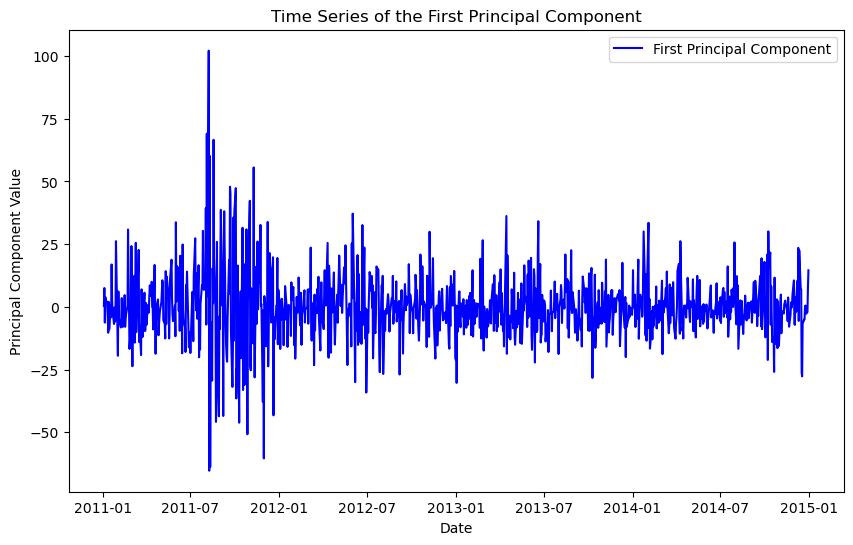

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(log_returns['date'], first_principal_component, color='b', label='First Principal Component')
plt.title('Time Series of the First Principal Component')
plt.xlabel('Date')
plt.ylabel('Principal Component Value')
plt.legend()
plt.show()

In [24]:
min_index = log_returns.loc[first_principal_component.argmin(), 'date']

print(f"The date where the first principal component is lowest is: {min_index}")

The date where the first principal component is lowest is: 2011-08-09 00:00:00


In [25]:
#https://en.wikipedia.org/wiki/August_2011_stock_markets_fall


In [26]:
weights_first_component = pca.components_[0, :]
weights_second_component = pca.components_[1, :]

In [27]:
ticker = pd.read_csv('SP500_ticker.csv')

In [28]:
weights_df = pd.DataFrame({'ticker': log_returns_nodate.columns, 'Weight': weights_first_component})

In [29]:
merged_df = pd.merge(weights_df, ticker, on='ticker')

In [30]:
mean_weights_by_sector = merged_df.groupby('sector')['Weight'].mean().reset_index()

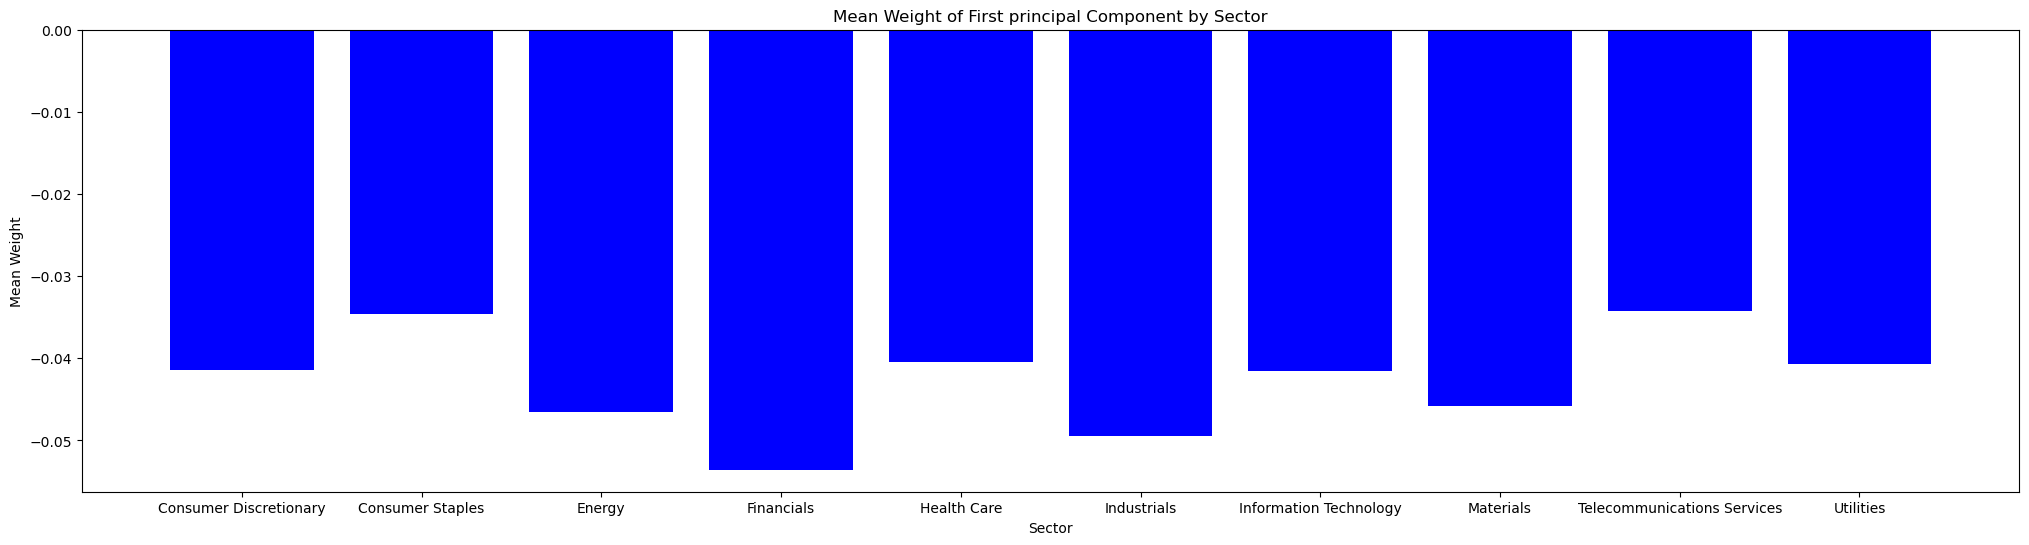

In [31]:
# Plot the bar plot
plt.figure(figsize=(25, 6))
plt.bar(mean_weights_by_sector['sector'], mean_weights_by_sector['Weight'], color='blue')
plt.title('Mean Weight of First principal Component by Sector')
plt.xlabel('Sector')
plt.ylabel('Mean Weight')
plt.show()

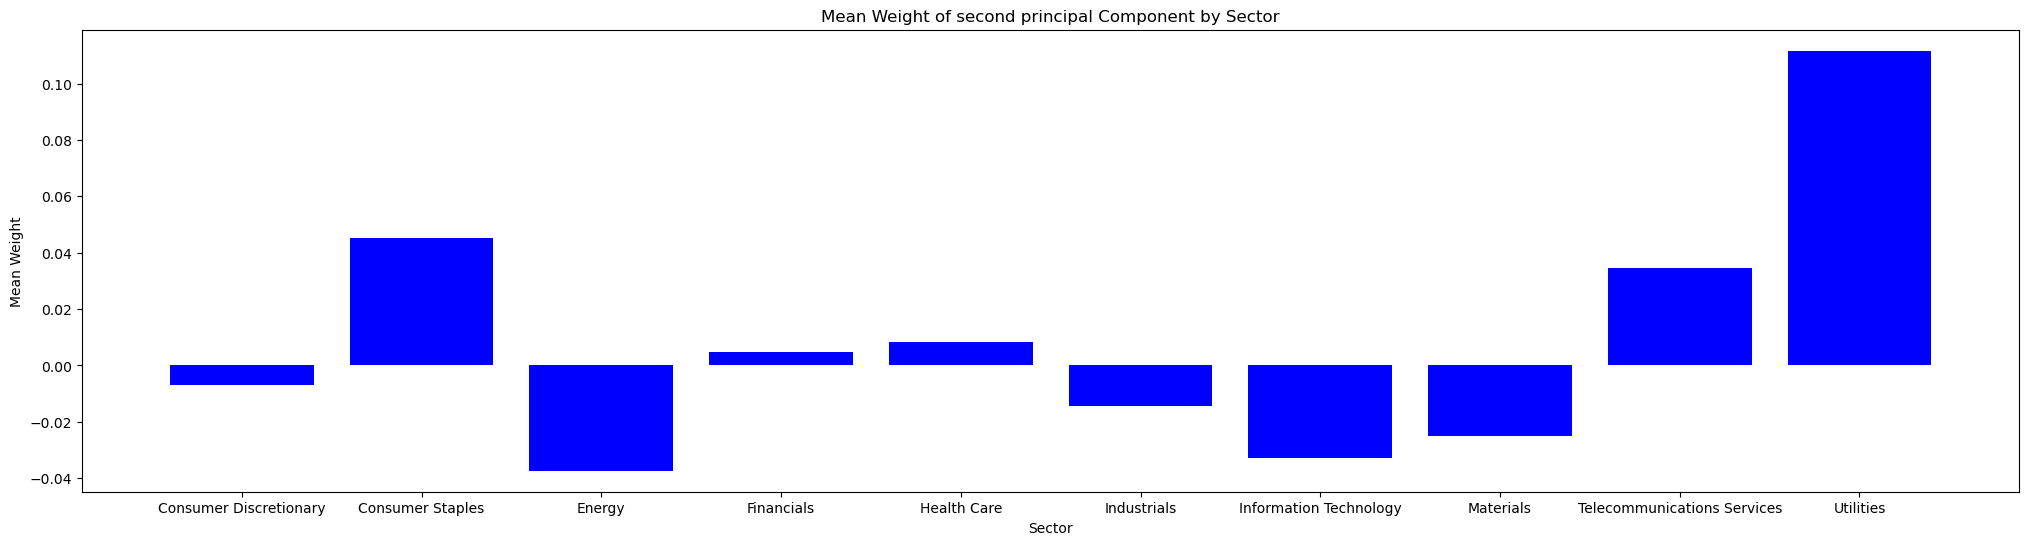

In [32]:
weights_df = pd.DataFrame({'ticker': log_returns_nodate.columns, 'Weight': weights_second_component})

merged_df = pd.merge(weights_df, ticker, on='ticker')
mean_weights_by_sector = merged_df.groupby('sector')['Weight'].mean().reset_index()
# Plot the bar plot
plt.figure(figsize=(25, 6))
plt.bar(mean_weights_by_sector['sector'], mean_weights_by_sector['Weight'], color='blue')
plt.title('Mean Weight of second principal Component by Sector')
plt.xlabel('Sector')
plt.ylabel('Mean Weight')
plt.show()